In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
taxi_jan_2019 = pd.read_parquet('data/yellow_tripdata_2019-01.parquet')
taxi_data = pd.concat([taxi_jan_2019])

In [5]:
print(taxi_data.shape)
taxi_data.head()

(7696617, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


In [6]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [7]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID',
       'DOLocationID', 'payment_type',  'total_amount']]

In [8]:
taxi_data.head()#priting the specific columns

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

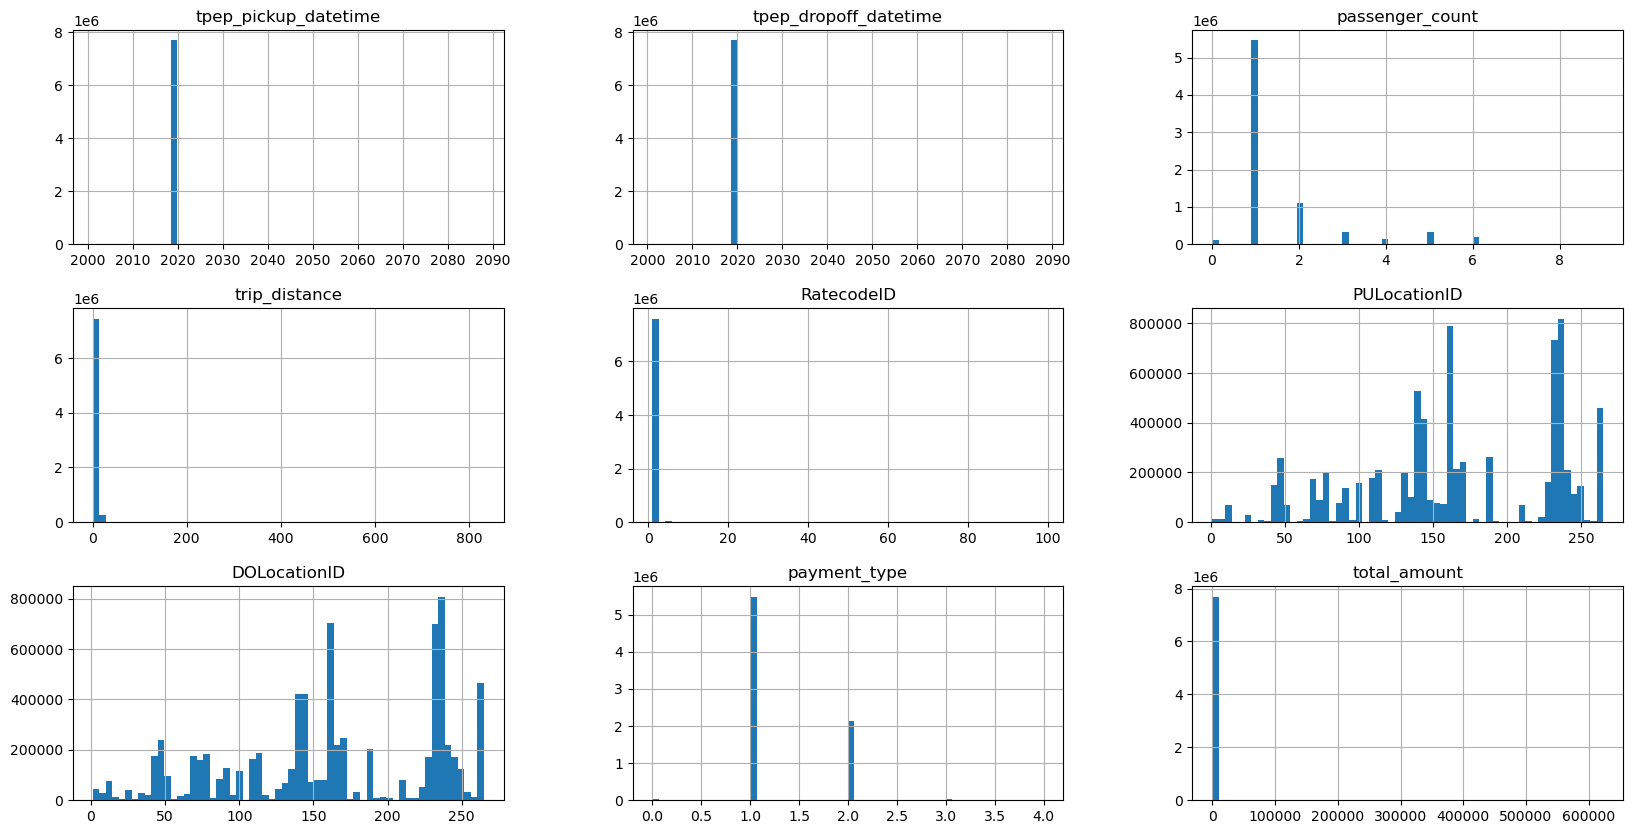

In [9]:
taxi_data.hist(figsize=(20,10), bins=60)

In [10]:
taxi_data['RatecodeID'].value_counts() #value counts lets us count the occurence of each unique element

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

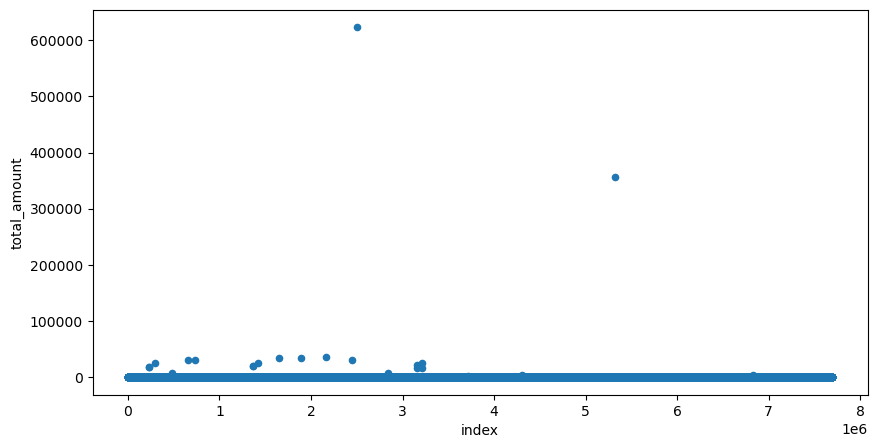

In [11]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

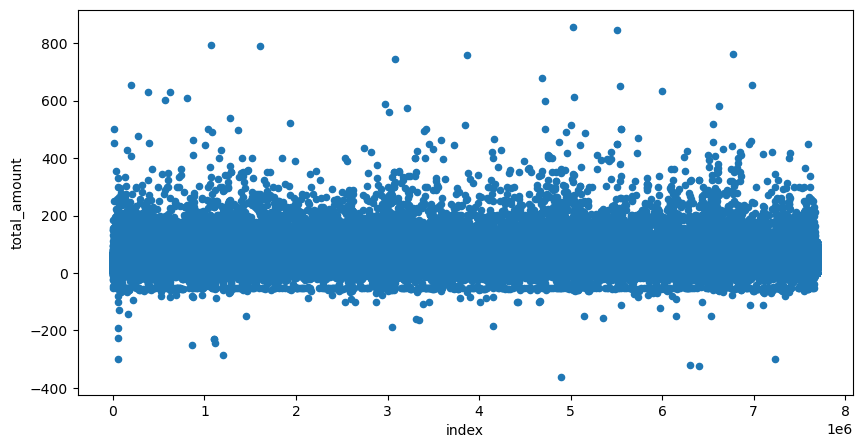

In [12]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

(7127, 9)


<Axes: xlabel='index', ylabel='total_amount'>

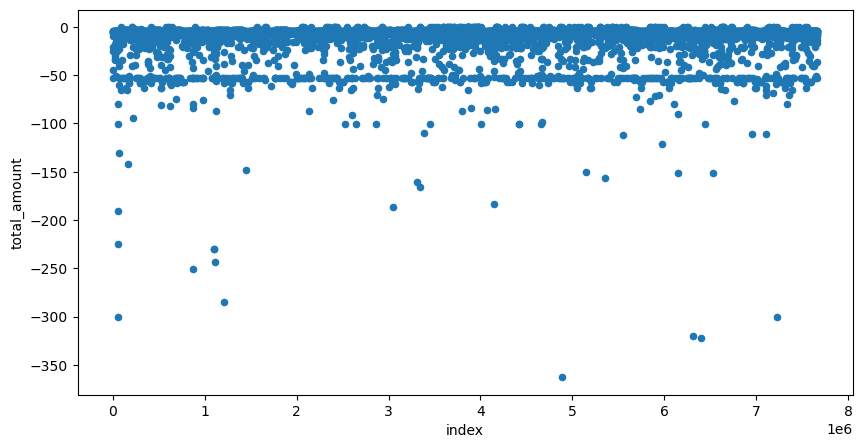

In [13]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [14]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [15]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

<Axes: >

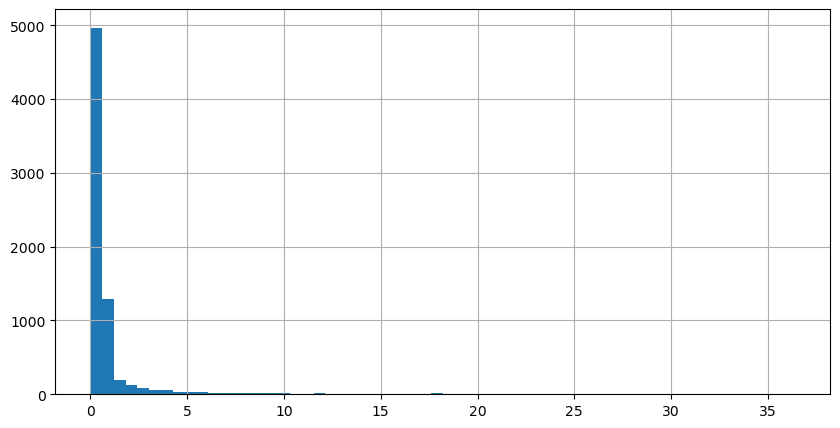

In [16]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))
#looking at the trip distance when the total amount is zero

In [17]:
#i see that we have people paying at zero value too so we can get rid of that

In [18]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [19]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
1    813
2    569
0    231
3     29
4      1
Name: count, dtype: int64

<Axes: >

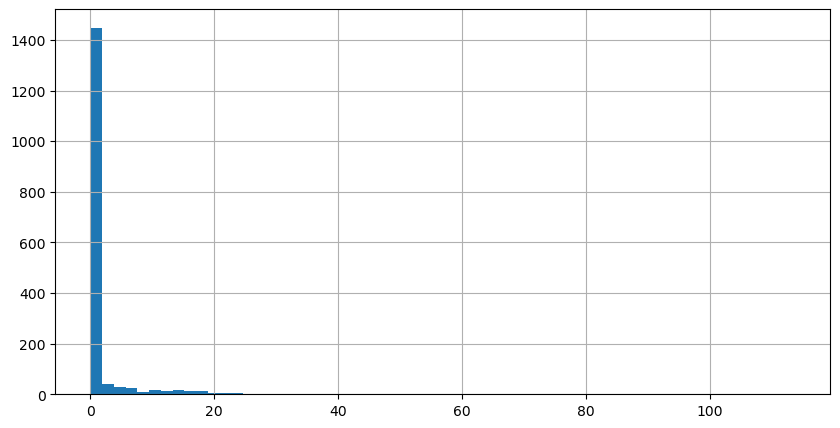

In [20]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [21]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: count, Length: 256, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

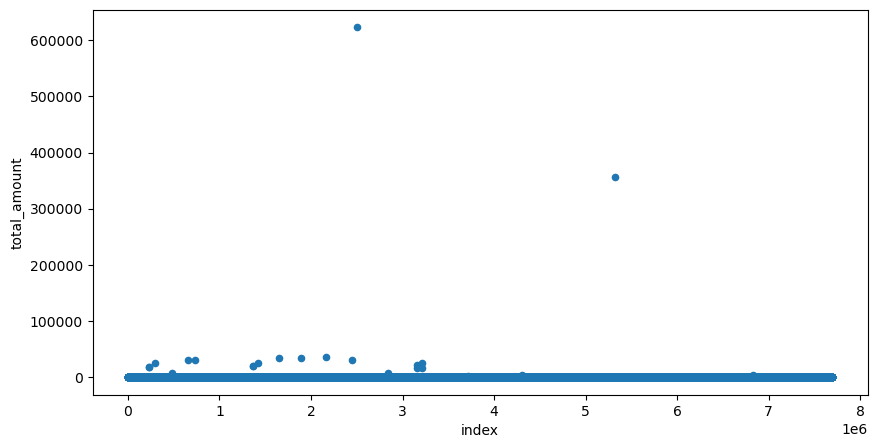

In [22]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [23]:
taxi_data[taxi_data['total_amount']>200].shape  #checking for the values more than 200,basically we cannot go higher than this 
#price range

(1166, 9)

In [24]:
taxi_data['total_amount'].mean() #mean amount people are paying for the taxi

15.810651344610214

In [25]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0)&(taxi_data['total_amount']<200)]

#getting rid of all the negative values and zero's and all the values lower than 200

In [26]:
print(taxi_data.shape)
taxi_data_filtered.shape

(7696617, 9)


(7688319, 9)

Checking for missing values

In [27]:
taxi_data_filtered.isna().sum()

#using pandas
#This uses the Pandas DataFrame method isna() to create a DataFrame of boolean values. True indicates a missing or 
#null value, and False indicates a non-missing value.

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28672
trip_distance                0
RatecodeID               28672
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [28]:
#dropping the missing values
taxi_data_filtered_clean = taxi_data_filtered.dropna()

In [29]:
# Check the shape of the cleaned DataFrame
print("Shape of original DataFrame:", taxi_data_filtered.shape)
print("Shape of cleaned DataFrame:", taxi_data_filtered_clean.shape)

Shape of original DataFrame: (7688319, 9)
Shape of cleaned DataFrame: (7659647, 9)


In [30]:
#checking again
missing_values = taxi_data_filtered_clean.isna().sum()

# Display the count of missing values
print(missing_values)

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64


df.dropna() -> This drops the rows where atleast one value is missing

Data Preparation
Fixing incorrect datatypes for model preparation in ML

In [31]:
#data frame names should be descriptive
taxi_data_prepared = taxi_data_filtered.copy()

#.copy copies the whole data and puts it into a new dataframe
#there are two types of copy shallow copy and deep copy

In [32]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [33]:
taxi_data_prepared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_pickup_datetime'])
taxi_data_prepared.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_dropoff_datetime'])

In [34]:
#changing the datatypes to str so it will end up giving object in the ouptut
taxi_data_prepared.loc[:,'RatecodeID']   = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

In [35]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [36]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


In [37]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
# -> we make it datetime again because it's very little use when it's just a string (can't compare, sort, etc.)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] =  taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [38]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55,2018-11-28,2018,11,28,15


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

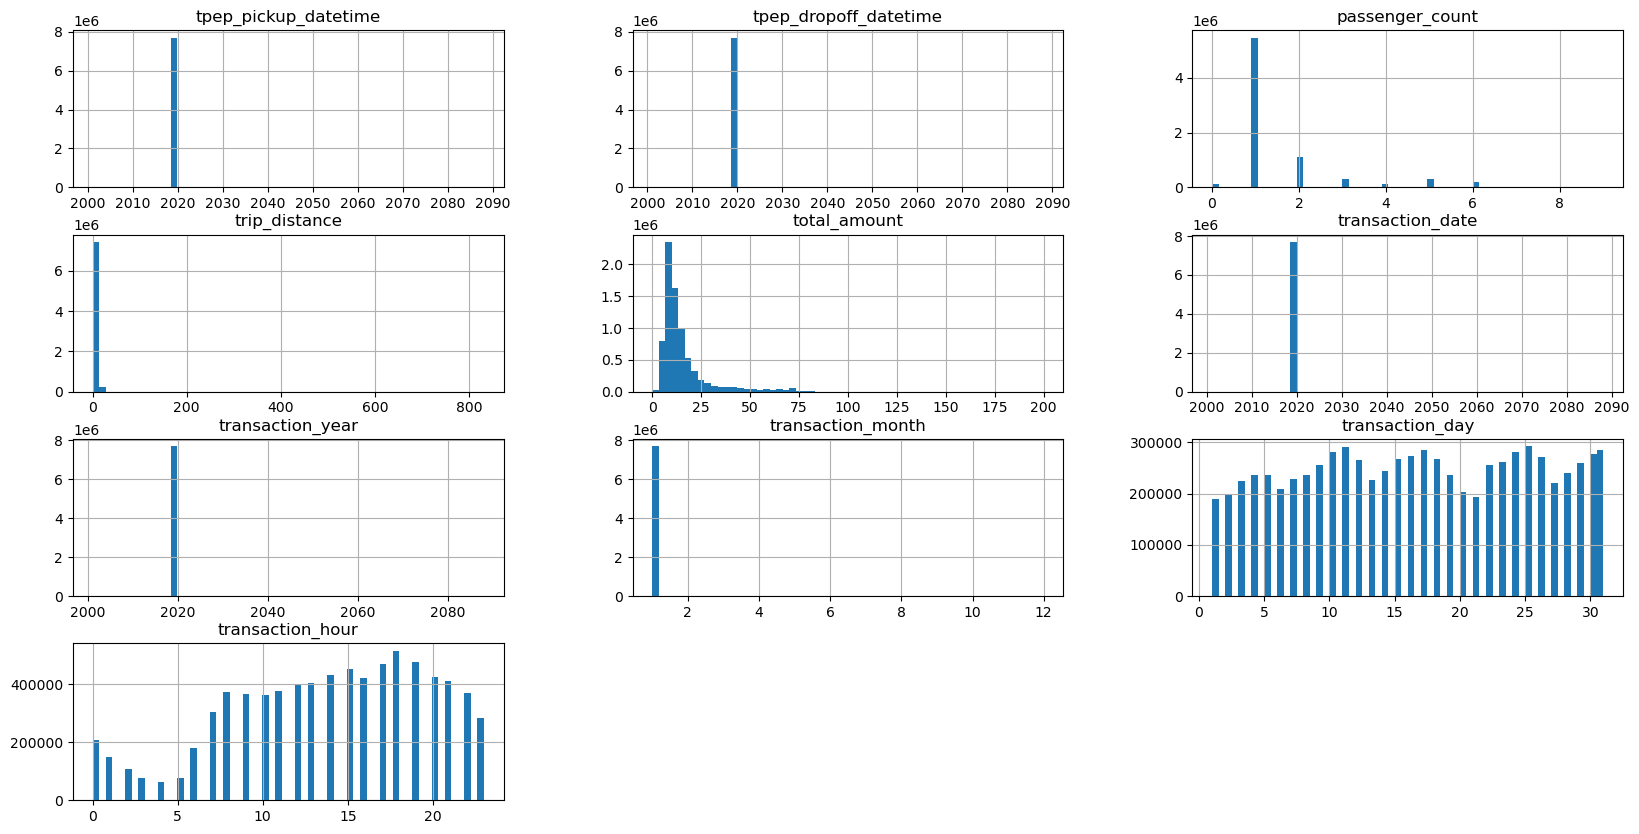

In [39]:
taxi_data_prepared.hist(figsize=(20,10), bins=60)

In [40]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2019]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

Problem Statement:- How much people spend in newyork in a certain region of new york in a given hour of a day

The mathematical operation we have to perform here is we have to take the average

In [41]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount'] #these are the numerical columns/features this is what we are tyring
# to predict
all_needed_columns = categorical_columns + numerical_columns

Basically we have to think of the stuff that will be useful to us while making our model

In [42]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7687783, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [43]:
#main_taxi_df.head(10) #learning :- we can specify the number of heads we want
# main_taxi_df.head()

In [44]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(102713, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


Performing certain operations to check if any values are repeating or not

In [45]:
# print(main_taxi_df['PULocationID'].value_counts())
#the bigger number is how many times one number appears in the column 

In [46]:
# main_taxi_df['Combined_Column'] = main_taxi_df['PULocationID'].astype(str) + '_' + main_taxi_df['total_amount'].astype(str)
# print(main_taxi_df['Combined_Column'].value_counts())

# #converting both the columns to strings 
# #putting the underscore as a seperator for both the columns

In [47]:
# print(main_taxi_df['PULocationID'].value_counts())

Now what we want to do is we want to get the location,date and hour lets say the same location,date and hour but with a different total amount

In [48]:
# taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
# taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
# print(taxi_grouped_by_region.shape)
# taxi_grouped_by_region.head()

Debugging the above issue

In [49]:
# print(main_taxi_df[categorical_columns].dtypes)

In [50]:
# print(main_taxi_df.isna().sum())

Performing some more operation exploring the data even more

In [51]:
# test_group = main_taxi_df.head(100)  # Take the first 100 rows for testing
# test_result = test_group.groupby(categorical_columns).mean().reset_index()
# print(test_result)

In [52]:
# # Splitting the 'total_amount' column on '_' and converting the resulting values to numeric
# main_taxi_df[['amount1', 'amount2']] = main_taxi_df['total_amount'].str.split('_', expand=True).apply(pd.to_numeric, errors='coerce')

# # Dropping the original 'total_amount' column
# main_taxi_df.drop('total_amount', axis=1, inplace=True)

# # Checking the DataFrame after fixing the 'total_amount' column
# main_taxi_df.head()

Visualazing the above taxi_grouped_by_region

<Axes: >

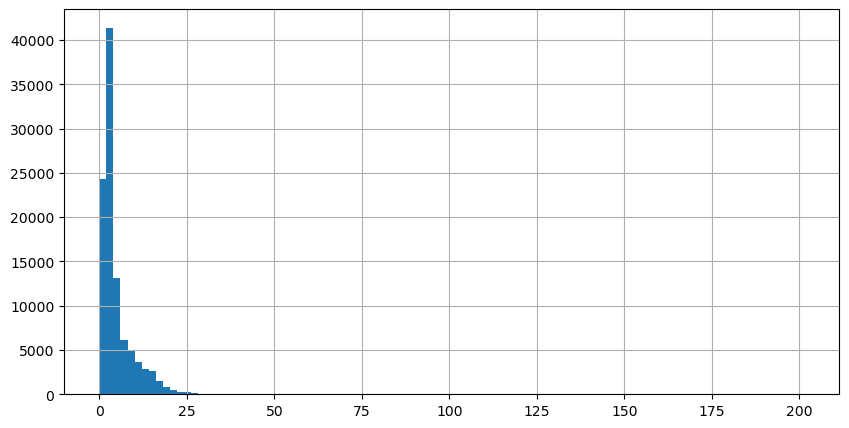

In [53]:
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize=(10,5))

<Axes: >

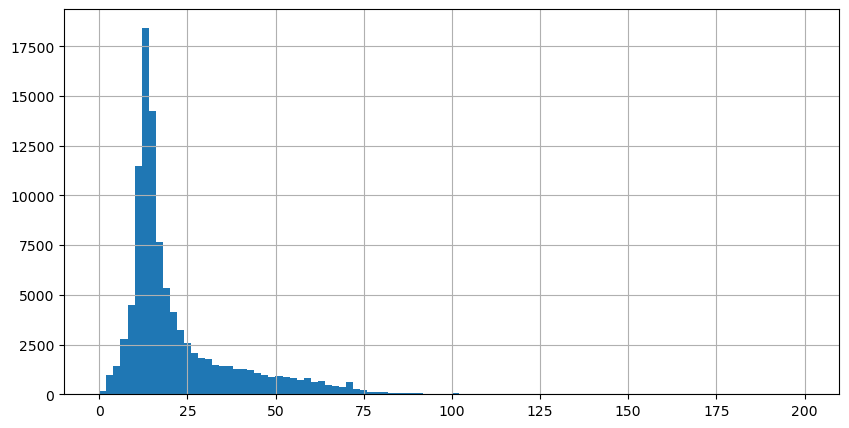

In [54]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))

# Bench Marking and fitting
Bench marking means an actual bench mark we are trying to pass while training

Benchmarking refers to evaluating and comparing the performance of different models or algorithms using standard datasets and metrics. This helps assess how well a model performs on specific tasks and helps understand which approaches work best for particular problems.

Basically trying different algorithms and seeing which works the best 

Benchmarking involves trying different algorithms on the same dataset to see which one performs best based on specific metrics, like accuracy or F1 score

# Fitting 

Fitting a model involves adjusting its parameters to improve accuracy and better capture the underlying patterns in the data, so it can make accurate predictions on new inputs.

There are two things we need to take care of here input features and target features , target features are the things we want to predict


Problem statement :- We want to figure out how much money or average money people spend in new york in a certain region in a give day, hour and month

In [55]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [56]:
data_for_benchmark_model

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.00,21.800,1
1,1,2019-01-01,1,1,5,0.00,87.300,1
2,1,2019-01-01,1,1,6,0.00,80.300,1
3,1,2019-01-01,1,1,8,0.00,128.580,2
4,1,2019-01-01,1,1,10,16.90,43.245,4
...,...,...,...,...,...,...,...,...
102708,98,2019-01-31,1,31,18,16.66,58.060,1
102709,99,2019-01-18,1,18,18,1.66,9.800,1
102710,99,2019-01-26,1,26,8,0.42,6.000,1
102711,99,2019-01-30,1,30,7,2.87,18.050,1


In [57]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark  = 'total_amount'

# Train Test Split

We have to split our dataset into train and Test dataset

We have to split in percentage , basically we want enough data to train our model and also leave enough data for the test set

0.33 -> This means that one third of the dataset will be test dataset and two thirds will be the training 

Link to one-hot encoding -> https://www.geeksforgeeks.org/ml-one-hot-encoding/

Basically machine learning models do not work well with categorical data we have both types of data like numerical and categorical 

 For example, suppose a dataset has a Gender column with categorical elements like Male and  Female. These labels have no specific order of preference and also since the data is string labels, machine learning models misinterpreted that there is some sort of hierarchy in them.

One approach to solve this problem can be label encoding where we will assign a numerical value to these labels for example Male and Female mapped to 0 and 1. But this can add bias in our model as it will start giving higher preference to the Female parameter as 1>0 but ideally, both labels are equally important in the dataset. To deal with this issue we will use the One Hot Encoding techniqu

## One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.e.

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split

# X_bench = data_for_benchmark_model[input_features_benchmark]
# y_bench = data_for_benchmark_model[target_feature_benchmark]

# # one-hot encode
# X_bench = pd.get_dummies(X_bench)

# X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

X_bench = pd.get_dummies(X_bench)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)


# Fitting the data to our model

Fitting a model involves adjusting its parameters to improve accuracy and better capture the underlying patterns in the data, so it can make accurate predictions on new inputs.

There are two things we need to take care of here input features and target features , target features are the things we want to predionth

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 10) #map depth is a hyperparameter here we have to think hyperparameters as knobs and settings 
# here we are deciding how deep we are letting the tree go
tree.fit(X_train_b,y_train_b)

DecisionTreeRegressor(max_depth=10)

# Model evaluation 

Since the model is trained we want to see how it performed , like how it is predicting is it good is it bad 

We are gonna be comparing the test to the predicted value to see how well we did

In [60]:
model_at_hand = tree
y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from numpy import sqrt

print('mean absolute error', mean_absolute_error(y_test_b, y_pred_b)) #what's mae -> the difference between what we predicted and what the actual value was
# here the outcome was three dollars
print('mean squared error', mean_squared_error(y_test_b, y_pred_b)) #what's mse -> it's the same as mae but it takes the square of it, if there is a bigger difference 
print('root mean squared error', sqrt(mean_squared_error(y_test_b, y_pred_b))) # it's the same as mean_squared_error but we root it
print('r2', r2_score(y_test_b, y_pred_b)) #r2 score shows how good a model fits the pattern of the data 

# if score is 0 it's not good

mean absolute error 3.383638182483072
mean squared error 61.01357083152216
root mean squared error 7.811118411054985
r2 0.79265015916411


<Axes: xlabel='true', ylabel='pred'>

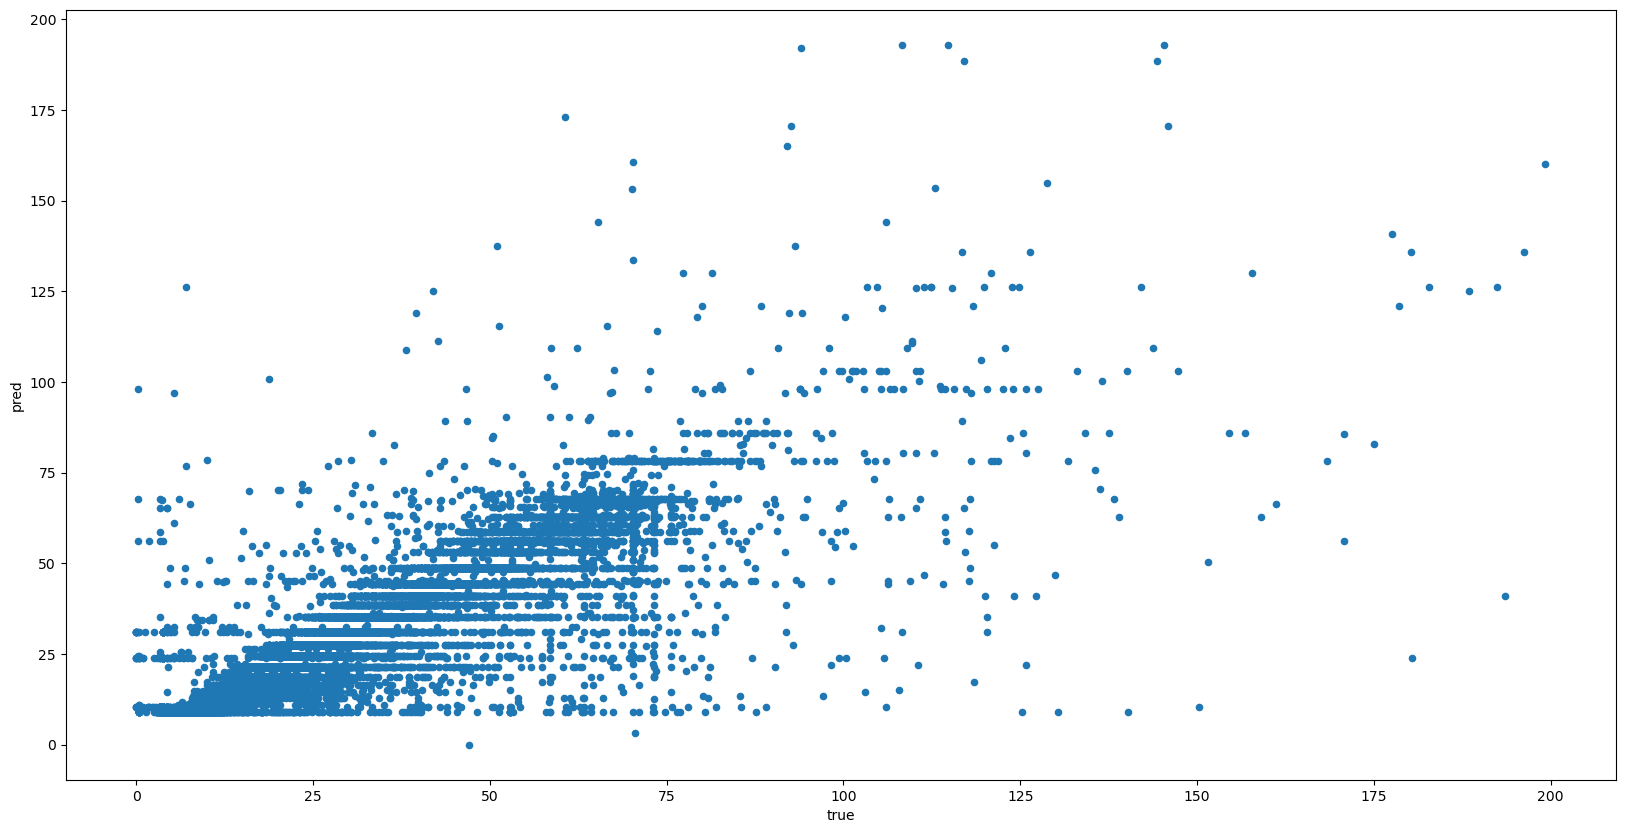

In [61]:
data = {'true':y_test_b,'pred':y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize = (20,10),kind = 'scatter',x = 'true',y = 'pred')

# Problem Fix 

In [62]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark
target_feature_benchmark  = 'total_amount'

# Train and test split
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

# Fit a model
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

# Evaluate model
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

# MAE AND RMSE -> THESE VALUES SHOULD BE SMALLER SINCE THEY CALCULATE THE DIFFERENCE

mean_absolute_error 10.706537101412458
mean_squared_error 241.34928109032336
root_mean_squared_error 15.53542020964748
r2 0.17979337485226587


<Axes: xlabel='true', ylabel='pred'>

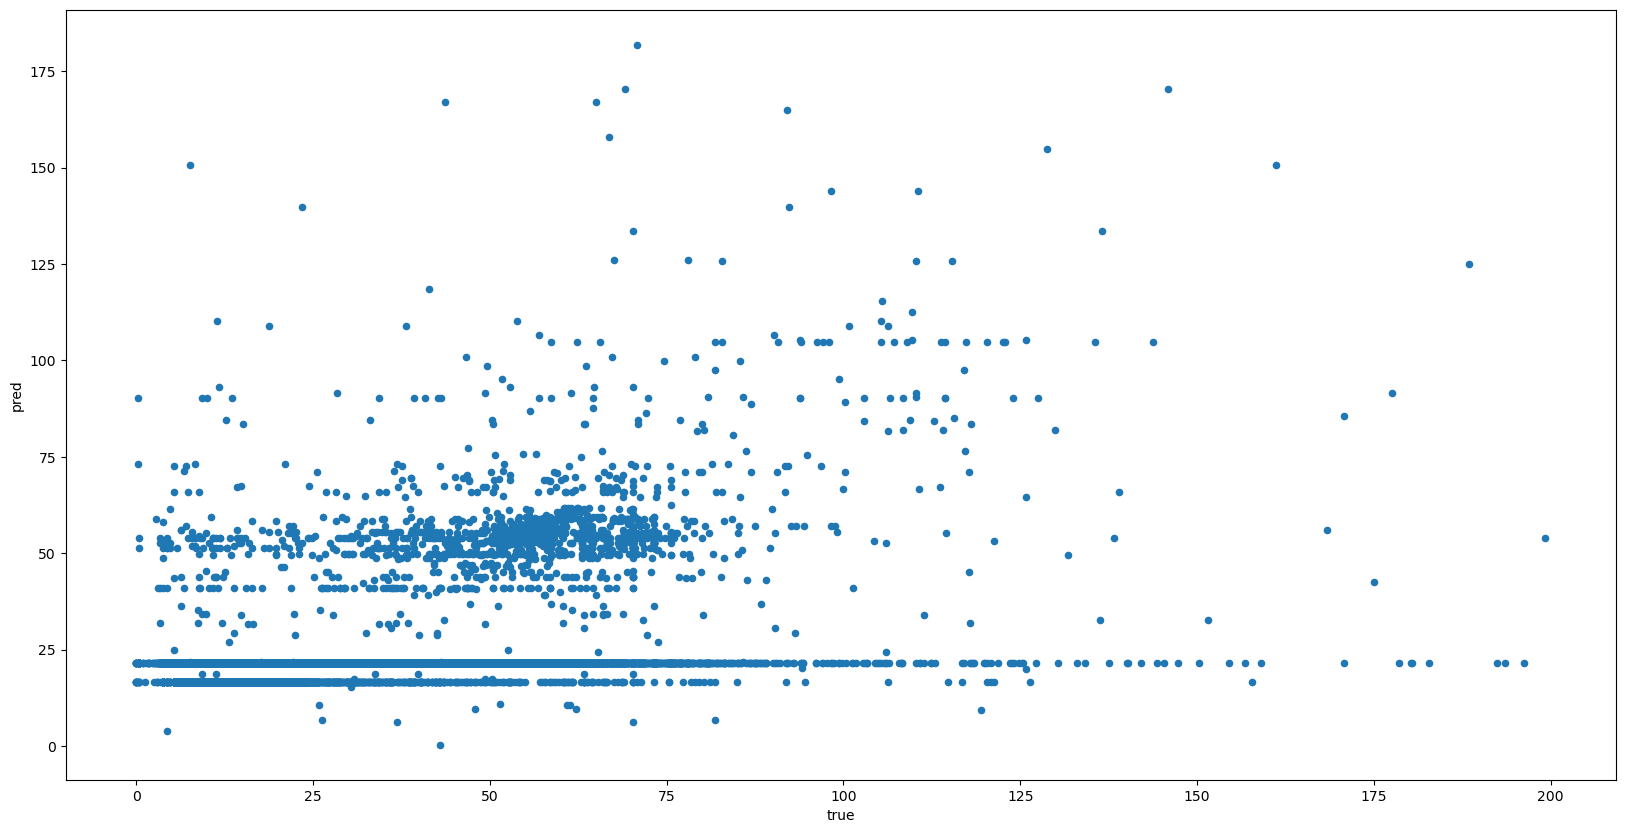

In [63]:
data = {'true':y_test_b,'pred':y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize = (20,10),kind = 'scatter',x = 'true',y = 'pred')

# Feature engineering -> Creating a bunch of new features

In [64]:
taxi_grouped_by_region.head() #seeing what we already have

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [65]:
data_with_new_features = taxi_grouped_by_region.copy() #creating a new dataset

In [66]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)

In [67]:
from pandas.tseries.holiday import USFederalHolidayCalendar #getting all the holidays and marking them in our dataset

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',
                        end='2020').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

In [68]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


Borough information

In [69]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [70]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [71]:
data_with_new_features['Borough'].value_counts() #a borough includes a couple of regions

Borough
Manhattan        45315
Brooklyn         23721
Queens           22000
Bronx             9649
Unknown            744
Staten Island      304
EWR                271
Name: count, dtype: int64

In [72]:
nyc_weather = pd.read_csv('data/nyc_weather.csv')
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [73]:
nyc_weather.shape

(2936, 6)

There are some percentage values and missing values which we can't work with easily 

In [74]:
nyc_weather.dtypes

# cloud cover and amount of precipitation are objects(strings) so we want them as numbers since there is a relatio between these numbers

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [75]:
nyc_weather['cloud cover'].value_counts() #observing how many times a particular value has occured

cloud cover
70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: count, dtype: int64

In [76]:
nyc_weather['amount of precipitation'].value_counts()

amount of precipitation
Trace of precipitation    266
0.3                        61
2.0                        49
1.0                        45
0.5                        42
0.8                        42
4.0                        33
5.0                        24
3.0                        23
6.0                        19
7.0                        13
8.0                        13
9.0                        11
10.0                       10
13.0                        7
12.0                        7
15.0                        6
11.0                        5
16.0                        3
22.0                        2
14.0                        2
29.0                        2
63.0                        1
21.0                        1
68.0                        1
17.0                        1
20.0                        1
30.0                        1
35.0                        1
34.0                        1
24.0                        1
18.0                        1
25.0            

In [77]:
nyc_weather.isna().sum() #checking if we have any missing values 

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

If we have missing values, we have to use our intiution and if it's zero that's why we think it's none just fill it with zero
but it's too many missing values for it to be zero 

another way is to use a fill method we can use a forward fill or backward fill

Forword fill -> Using the last occurred number to fill the next number 
Example :- Let's say we have the data for 1 pm but we don't have the data for 2pm and so on , so we use forward fill

Backward fill -> Using the lastest value to fill the places behind it

In [78]:
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].astype(float)
# option 1
# nyc_weather['amount of precipitation'].fillna(0, inplace=True)
# option 2
#nyc_weather['amount of precipitation'].fillna(method='ffill', inplace=True)
# option 3
nyc_weather['amount of precipitation'].interpolate(inplace=True)

In [79]:
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('20–30%.', 0.3)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)

In [80]:
nyc_weather.dtypes #after converting the values

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [81]:
# Converting 'date and time' column to datetime format
nyc_weather['date and time'] = pd.to_datetime(nyc_weather['date and time'])
nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
nyc_weather['month'] = nyc_weather['date and time'].dt.month
nyc_weather['day'] = nyc_weather['date and time'].dt.day

C:\Users\CHITRESH.LAPTOP-DAD6S1E5\AppData\Local\Temp\ipykernel_10876\3321089785.py:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  nyc_weather['date and time'] = pd.to_datetime(nyc_weather['date and time'])


In [82]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000,22,12,31
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.233333,19,12,31
2,2019-12-31 16:00:00,7.2,66,5,0.5,0.166667,16,12,31
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.100000,13,12,31
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.100000,10,12,31


In [83]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [84]:
#Merging two columns

nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather, left_on = ['transaction_month','transaction_day','transaction_hour'], right_on = ['month','day','hour'], how='left')

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(102713, 21)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,...,EWR,2019-01-01 10:00:00,15.6,62.0,11.0,0.7,0.473333,10.0,1.0,1.0


In [85]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['date and time','hour','month','day'], axis=1)

In [86]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR,15.6,62.0,11.0,0.7,0.473333


In [87]:
nyc_taxi_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
count_of_transactions          0
transaction_week_day           0
weekend                        0
is_holiday                     0
Borough                      709
temperature                65823
humidity                   65823
wind speed                 65823
cloud cover                65823
amount of precipitation    65823
dtype: int64

In [88]:
nyc_taxi_with_weather = nyc_taxi_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)

In [89]:
import pandas as pd

nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
# Backfill remaining missing values
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum()

PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transactions      0
transaction_week_day       0
weekend                    0
is_holiday                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [90]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Queens,8.3,97.0,0.0,1.0,29.0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0


# Model Training

In [91]:
data_for_model = nyc_taxi_with_weather.copy()

In [92]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_feature = 'total_amount'

In [93]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [94]:
from sklearn.tree import DecisionTreeRegressor 

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [95]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 8.964482857771856
mean_squared_error 207.54134360520044
root_mean_squared_error 14.40629527689893
r2 0.3094968568677011


<Axes: xlabel='true', ylabel='pred'>

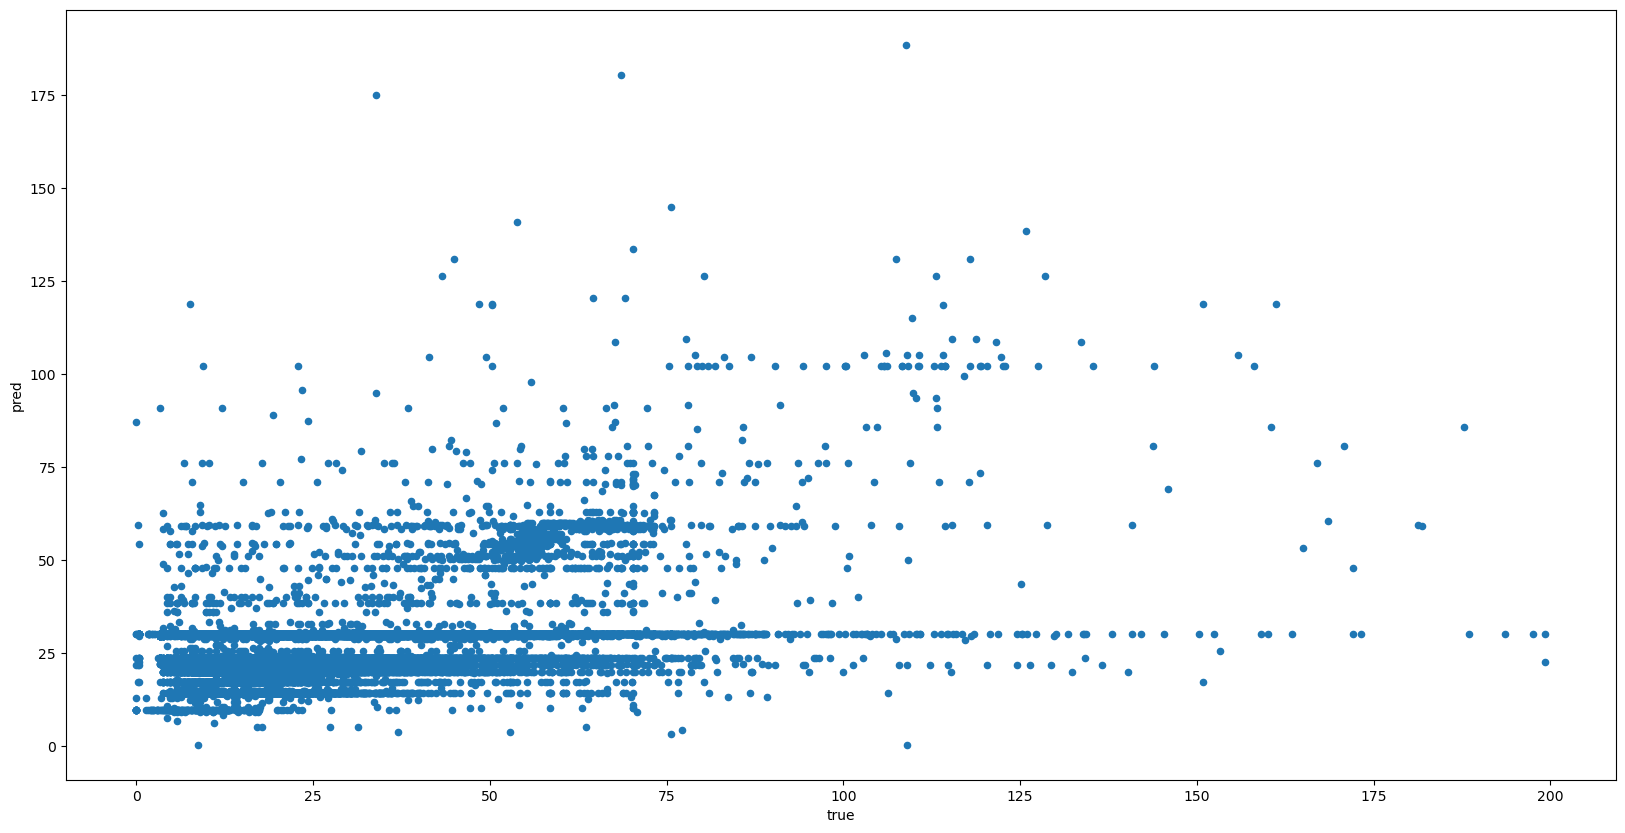

In [96]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

Overfit

In [97]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [98]:
rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)
    
    model_at_hand_overfit = decision_tree_overfit
    
    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    
    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [99]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,1.540702e+01,15.490908
1,5,1.465628e+01,14.846529
2,8,1.403473e+01,14.527442
3,10,1.363071e+01,14.400237
4,15,1.257889e+01,14.447478
5,20,1.171095e+01,14.641850
6,30,1.016299e+01,15.138982
7,50,6.600995e+00,16.633781
8,70,2.139793e+00,17.609948
9,100,5.908302e-17,17.759334


Text(0, 0.5, 'root mean squared error')

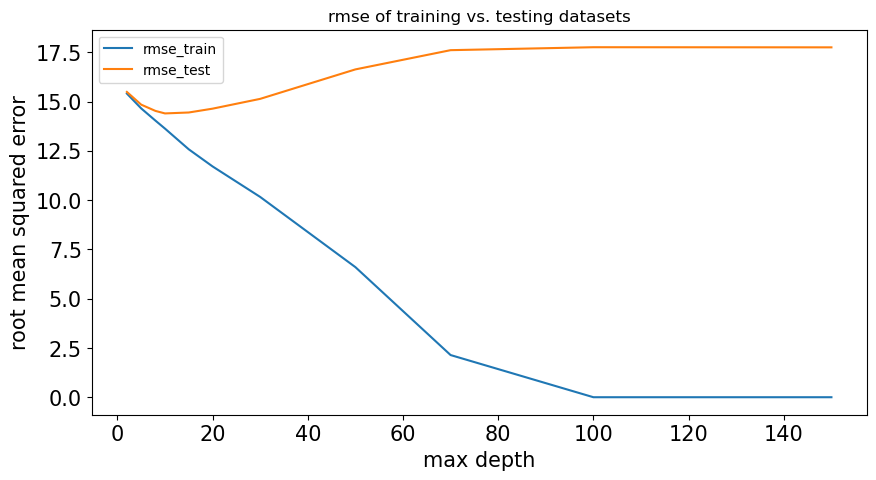

In [100]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5),title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

Underfit

In [101]:
X_train_underfit = X_train
y_train_underfit = y_train

X_test_underfit = X_test
y_test_underfit = y_test

In [102]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=1)
decision_tree_underfit.fit(X_train_underfit, y_train_underfit)

# Training performance

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(X_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_train_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2', r2_score(y_train_underfit, y_pred_underfit))

mean_absolute_error 10.435633757944085
mean_squared_error 252.13147170317885
root_mean_squared_error 15.878648295846181
r2 0.13910052456142474


Random Forest

In [104]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

In [ ]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

In [ ]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')